<a href="https://colab.research.google.com/github/nouranali/SureStart_VAILTraining/blob/master/Kerasautoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## In this notebook I'll be learning about autoencoders and how to use them with upsampling

### I'm learning from this [tutorial](https://blog.keras.io/building-autoencoders-in-keras.html) which has both demonstration and code example 

In [1]:
# simple example
from keras.datasets import mnist
import numpy as np

# This is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)

In [2]:
encoder = keras.Model(input_img, encoded)

In [3]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

MNIST with autoencoders, we'll discard the labels as we'll decode and encode the images

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
# normalization of data and reshaping
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
# train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 3s 10ms/step - loss: 0.3830 - val_loss: 0.1875
Epoch 2/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1790 - val_loss: 0.1532
Epoch 3/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1491 - val_loss: 0.1336
Epoch 4/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1317 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1205 - val_loss: 0.1130
Epoch 6/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1126 - val_loss: 0.1072
Epoch 7/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1071 - val_loss: 0.1030
Epoch 8/50
235/235 [==============================] - 2s 9ms/step - loss: 0.1033 - val_loss: 0.0998
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1003 - val_loss: 0.0974
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.0979 - val_loss: 0.095

In [10]:
# encode/decode images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

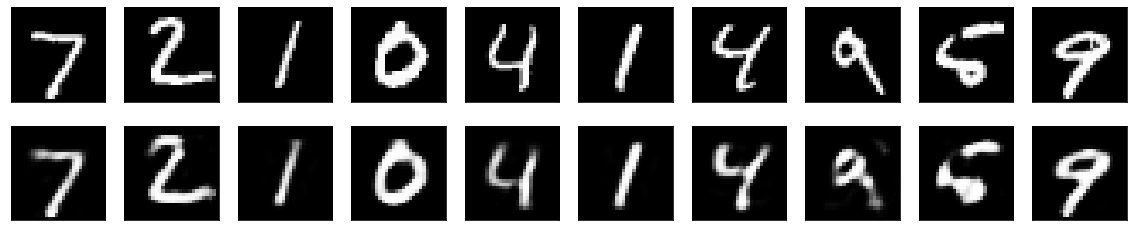

In [11]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Wow, the neural network learnt to deconsruct then construct the images

we'll add a contstraint on hiddedn layer size

In [12]:
from keras import regularizers

encoding_dim = 32

input_img = keras.Input(shape=(784,))
# Add a Dense layer with a L1 activity regularizer
encoded = layers.Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

## Deep auto encoder with more layers

In [14]:
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

In [15]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 3s 12ms/step - loss: 0.3354 - val_loss: 0.1639
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1584 - val_loss: 0.1422
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1396 - val_loss: 0.1288
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1282 - val_loss: 0.1206
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1205 - val_loss: 0.1153
Epoch 6/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1152 - val_loss: 0.1105
Epoch 7/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1110 - val_loss: 0.1071
Epoch 8/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1075 - val_loss: 0.1047
Epoch 9/100
235/235 [==============================] - 3s 13ms/step - loss: 0.1055 - val_loss: 0.1032
Epoch 10/100
235/235 [==============================] - 3s 13ms/step - loss: 0.103

## convolutional autoencoders

In [16]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [ ]:
%load_ext tensorboard
%tensorboard --logdir="/tmp/autoencoder"

In [25]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
469/469 [==============================] - 82s 173ms/step - loss: 0.3269 - val_loss: 0.1457
Epoch 2/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1402 - val_loss: 0.1254
Epoch 3/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1245 - val_loss: 0.1179
Epoch 4/50
469/469 [==============================] - 80s 171ms/step - loss: 0.1179 - val_loss: 0.1134
Epoch 5/50
469/469 [==============================] - 80s 172ms/step - loss: 0.1137 - val_loss: 0.1104
Epoch 6/50
469/469 [==============================] - 80s 172ms/step - loss: 0.1111 - val_loss: 0.1082
Epoch 7/50
469/469 [==============================] - 80s 172ms/step - loss: 0.1091 - val_loss: 0.1068
Epoch 8/50
469/469 [==============================] - 81s 172ms/step - loss: 0.1075 - val_loss: 0.1058
Epoch 9/50
469/469 [==============================] - 80s 172ms/step - loss: 0.1066 - val_loss: 0.1041
Epoch 10/50
469/469 [==============================] - 80s 171ms/step - l

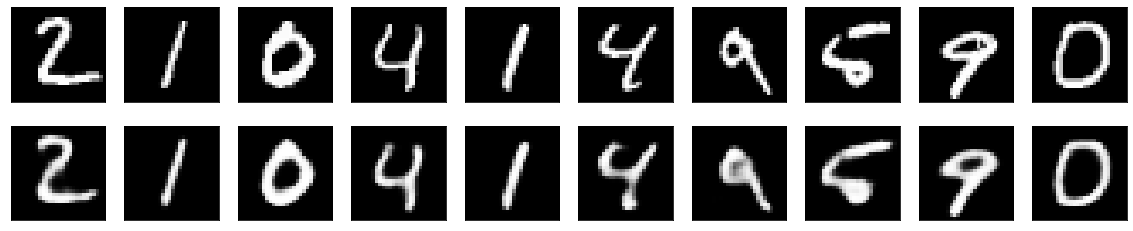

In [26]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

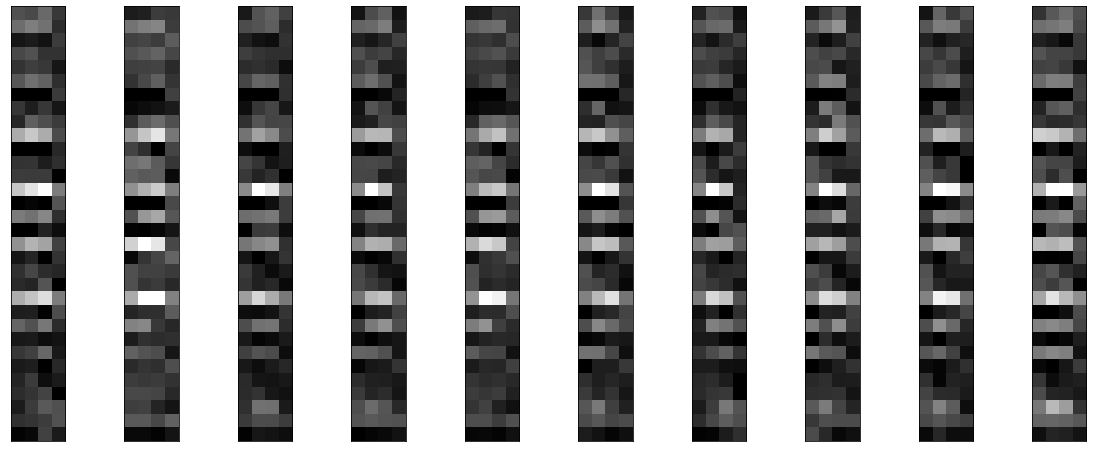

In [27]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Image denoising

In [28]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))
## add noise to immages
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


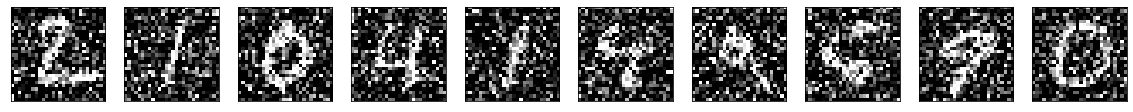

In [29]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [30]:
# build conv autoencoder to denoise
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 147s 312ms/step - loss: 0.2628 - val_loss: 0.1158
Epoch 2/100
469/469 [==============================] - 147s 313ms/step - loss: 0.1147 - val_loss: 0.1086
Epoch 3/100
469/469 [==============================] - 147s 314ms/step - loss: 0.1085 - val_loss: 0.1054
Epoch 4/100
469/469 [==============================] - 147s 313ms/step - loss: 0.1053 - val_loss: 0.1029
Epoch 5/100
469/469 [==============================] - 147s 314ms/step - loss: 0.1035 - val_loss: 0.1016
Epoch 6/100
469/469 [==============================] - 146s 312ms/step - loss: 0.1021 - val_loss: 0.1009
Epoch 7/100
469/469 [==============================] - 147s 313ms/step - loss: 0.1009 - val_loss: 0.0995
Epoch 8/100
469/469 [==============================] - 146s 311ms/step - loss: 0.1001 - val_loss: 0.0988
Epoch 9/100
469/469 [==============================] - 145s 310ms/step - loss: 0.0992 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] -